In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

In [2]:
def GetVectorF(G,r):   
    dim = len(G)
    
    v = np.zeros(dim)
    
    if dim == 3:
        for i in range(dim):
            v[i] = G[i](r[0],r[1],r[2])
    if dim == 2:
        for i in range(dim):
            v[i] = G[i](r[0],r[1])
        
    return v

In [3]:
def GetJacobian(G,r,h=1e-6):
    
    dim = len(G)
    
    J = np.zeros((dim,dim))
    
    if dim == 3:
        for i in range(dim):
            J[i,0] = (  G[i](r[0]+h,r[1],r[2]) - G[i](r[0]-h,r[1],r[2]) )/(2*h)
            J[i,1] = (  G[i](r[0],r[1]+h,r[2]) - G[i](r[0],r[1]-h,r[2]) )/(2*h)
            J[i,2] = (  G[i](r[0],r[1],r[2]+h) - G[i](r[0],r[1],r[2]-h) )/(2*h)
            
    elif dim == 2:
        for i in range(dim):
            J[i,0] = (  G[i](r[0]+h,r[1]) - G[i](r[0]-h,r[1]) )/(2*h)
            J[i,1] = (  G[i](r[0],r[1]+h) - G[i](r[0],r[1]-h) )/(2*h)
        
    return J.T

In [4]:
def GetMetric(G,r):
    v = GetVectorF(G,r)
    return 0.5*np.linalg.norm(v)**2

In [5]:
def GetFig(F,R,it):
    M,N = R.shape
    
    fig = plt.figure(figsize=(8,4))
    
    if N == 3:
        labels = ['X','Y','Z']
    elif N == 2:
        labels = ["X","Y"]
    
    ax = fig.add_subplot(1,2,1)
    ax1 = fig.add_subplot(1,2,2)

    ax.set_title('Metric: %.20f' %(F[it]))

    ax.plot(F[:it])
    ax.set_xlabel('%.0f' %(it))
    ax.set_yscale('log')
    ax1.plot(R[:it],label=labels)
    ax1.set_xlabel('%.0f' %(it))
    ax1.legend(loc=0)
    
    plt.show()

In [6]:
def GetSolve(G,r,lr=1e-3,epochs=int(1e5),error=1e-7):
    
    d = 1
    it = 0
    Vector_F = np.array([])
    
    R_vector = np.array(r)
    
    while d > error and it < epochs:
        
        CurrentF = GetMetric(G,r)
        
        J = GetJacobian(G,r)
        
        GVector = GetVectorF(G,r)
        
        #Machine Learning
        r -= lr*np.dot(J,GVector) 
        
        R_vector = np.vstack((R_vector,r))
        
        NewF = GetMetric(G,r)
        
        
        Vector_F = np.append(Vector_F,NewF)
        
        d = np.abs( CurrentF - NewF )/NewF
        
        
        if it%500 == 0:
            
            clear_output(wait=True)
            GetFig(Vector_F,R_vector,it)
            time.sleep(0.01)
            
        it += 1
        
    if d < error:
        print(' Entrenamiento completo ', d, 'iteraciones', it)
        
    if it == epochs:
        print(' Entrenamiento no completado ')
        
    return r,it,Vector_F,R_vector

In [7]:
def NewtonRaphson(G,r,error=1e-14):
    
    it = 0
    d = 1
    Vector_d = np.array([])
    
    while d > error:
        
        it += 1
        
        rc = r
        
        F = GetVectorF(G,r)
        J = GetJacobian(G,r)
        InvJ = np.linalg.inv(J)
        
        r = rc - np.dot( InvJ, F )
        
        diff = r - rc
        
        d = np.linalg.norm(diff)
        
        Vector_d = np.append( Vector_d , d )
        
    return r,it

<h1><center>PRIMER SISTEMA DE ECUACIONES</center></h1>
$$ ln(x^2+y^2)-sin(xy)-ln(2)-ln(\pi)=0 $$
$$ e^{x-y}+cos(xy)=0 $$

In [8]:
S1=(lambda x,y: np.log(x**2 + y**2) - np.sin(x*y)- np.log(2) - np.log(np.pi), \
   lambda x,y: np.e**(x-y) + np.cos(x*y) )

x0 = (2,2)

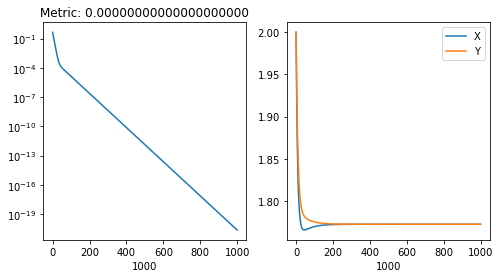

 Entrenamiento completo  0.0 iteraciones 1431


In [9]:
x1grad,it1,F1,R1 = GetSolve(S1,x0,lr=1e-2)

In [10]:
#SOLUCIÓN CON DESCENSO DEL GRADIENTE
x1grad

array([1.77245385, 1.77245385])

In [11]:
#RESULTADO DEL SISTEMA DE ECUACIONES CON DESCENSO DEL GRADIENTE
GetVectorF(S1,x1grad)

array([-2.22044605e-16, -1.04360964e-14])

In [12]:
#SOLUCIÓN CON NEWTON RAPHSON
x1newton,it1 = NewtonRaphson(S1,x0)
x1newton

array([1.77245385, 1.77245385])

In [13]:
print("Iteraciones: ",it1)

Iteraciones:  162


In [14]:
#RESULTADO DEL SISTEMA DE ECUACIONES CON NEWTON RAPHSON
GetVectorF(S1,x1newton)

array([ 1.08801856e-14, -2.88657986e-15])

<h2><center>SEGUNDO SISTEMA DE ECUACIONES</center></h2>
$$ 6x-2cos(yz)-1=0 $$
$$ 9y+\sqrt{x^2+sin(z)+1.06}+0.9=0 $$
$$ 60z+3e^{-xy}+10\pi-3=0 $$

In [15]:
S2=(lambda x,y,z: 6*x - 2*np.cos(y*z) - 1, \
   lambda x,y,z: 9*y + np.sqrt(x**2 + np.sin(z) + 1.06) + 0.9 , \
   lambda x,y,z: 60*z + 3*np.e**(-x*y) + 10*np.pi -3 )

x_0 = (0,0,0)

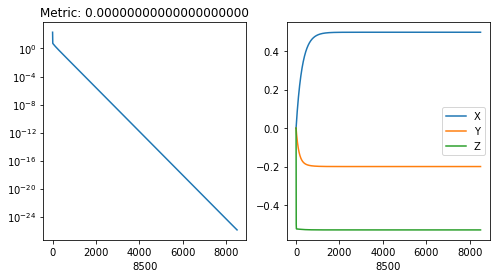

 Entrenamiento completo  0.0 iteraciones 8536


In [16]:
x2grad,it2,F2,R2 = GetSolve(S2,x_0,lr=1e-4)

In [17]:
#SOLUCIÓN CON DESCENSO DEL GRADIENTE
x2grad

array([ 0.49814468, -0.1996059 , -0.52882598])

In [18]:
#RESULTADO DEL SISTEMA DE ECUACIONES CON DESCENSO DEL GRADIENTE
GetVectorF(S2,x2grad)

array([-1.39444012e-13,  1.44328993e-14,  7.10542736e-15])

In [19]:
#SOLUCIÓN CON NEWTON RAPHSON
x2newton,it2 = NewtonRaphson(S2,x_0)
x2newton

array([ 0.49814468, -0.1996059 , -0.52882598])

In [20]:
print("Iteraciones: ",it2)

Iteraciones:  16


In [21]:
#RESULTADO DEL SISTEMA DE ECUACIONES CON NEWTON RAPHSON
GetVectorF(S2,x2newton)

array([-5.10702591e-15,  1.16573418e-14, -7.10542736e-15])